###### Аннотация
В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


Данные, которые содержатся в датасете:
```
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении
Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.
```


<a id="back"></a>
### Содержание 

- #### [Шаг 1. Изучение данных из файла](#step_1)
- #### [Шаг 2. Предобработка данных](#step_2)
- ##### [2.1 Предобработка данных. Заполнение пропусков.](#step_2.1)
- ##### [2.2 Предобработка данных. Изменение типов данных.](#step_2.2)
- #### [Шаг 3. Расчёты и добавление результатов в таблицу.](#step_3)
- #### [Шаг 4. Исследовательский анализ данных.](#step_4)
- #### [Шаг 5. Общий вывод](#step_5)

<a id="step_1"></a>
## Изучение данных из файла
[к оглавлению](#back)

### Импорт данных и общая информация.
[к оглавлению](#back)

Датасет для колаба сохранён здесь:
https://drive.google.com/file/d/18-EpY_uhM5Hc2qA8Cw6sNjp_fxuSK4I6/view?usp=sharing

id для скачивания: 18-EpY_uhM5Hc2qA8Cw6sNjp_fxuSK4I6

Импортируем датасет:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
pth_yp = '/datasets/real_estate_data.csv'
pth_lc = '../datasets/real_estate_data.csv'

if os.path.exists(pth_yp):
    df = pd.read_csv(pth_yp, sep = '\t')
elif os.path.exists(pth_lc):
    df = pd.read_csv(pth_lc, sep = '\t')
else:
    print('Something is wrong')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Выводы:

1 = Часть данных неполна (где значений меньше, чем общее количество строк 23699), её нужно будет достраивать или отбрасывать. 

2 = Часть - имеет неверный тип данных (например, `is_appartment` - сместо булева - строчный, а `floors_total` - float вместо int).

In [4]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


Оценим, какая доля пропусков есть в каждом столбце:



<a id="step_2"></a>
## Предобработка данных 
[к оглавлению](#back)

<a id="step_2.1"></a>
### заполнение пропусков
[к оглавлению](#back)

Определим количество пропусков в данных.
!! разобраться, как работает стайлер, чтобы было понятно, как самому это оформлять. 

In [5]:
display(
  pd.DataFrame(
    round(
      (df.isna().mean()*100),2), 
      columns=['NaNs, %'])
      .style.format('{:.2f}')
      .background_gradient('coolwarm'))

,"NaNs, %"
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,38.80
floors_total,0.36
living_area,8.03
floor,0.00
is_apartment,88.29


Начнём шаг за шагом пропуски заполнять.

Начнём с наиболее понятного параметра `is_apartment`.

#### Заполняем `is_apartment`

Параметр обозначает, является ли квартира апартаметрами. Вероятно, владельцы кваритир или риэлторы, когда запоняли этот пункт, могли просто оставить его назаполненным, если считали, что к ним это не относится. Тогда большинство заполненных должны быть единицами / True. Проверим:

In [6]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Действительно, бОлшая часть заполненного - это подтверждение того, что аппартаметры, и лишь незначительная часть - что нет. 

Значит, мы можем заполнить NaN значениями логического False. Сделаем это:

In [7]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

В этом стобце не осталось пустых значений, идём дальше. 

#### Заполняем `balcony`

Здесь также испходим из того, что если не указано число балконов, то гипотеза аналогичная - их не указали, потому что их просто нет, а ноль писать не стали.  Проверим, сколько и каких значений есть в этом столбце:

In [8]:
df['balcony'].value_counts()

1.00    4195
0.00    3758
2.00    3659
5.00     304
4.00     183
3.00      81
Name: balcony, dtype: int64

Действительно, нули пишут только в трети случаев, когда вообще указывают количество балконов. Заменим пропущенные значения нулями:

In [9]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].value_counts()

0.00    15277
1.00     4195
2.00     3659
5.00      304
4.00      183
3.00       81
Name: balcony, dtype: int64

#### Заполняем `locality_name`

Это название города. Здесь подход другой, т.к. 
* а) количество пропусков весьма небольшое, 
* б) восстановить его из других данных мы достоверно не можем - это будет угадайка. 

Поэтому эти значения допустимо просто отбросить. Сделаем это:

In [10]:
df = df.dropna(subset = ['locality_name'])
df['locality_name'].value_counts()

Санкт-Петербург                 15721
посёлок Мурино                    522
посёлок Шушары                    440
Всеволожск                        398
Пушкин                            369
                                ...  
деревня Трубников Бор               1
поселок Коробицыно                  1
деревня Терпилицы                   1
коттеджный посёлок Лесное           1
городской посёлок Свирьстрой        1
Name: locality_name, Length: 364, dtype: int64

#### Заполняем `ceiling_height`

Это высота потока в квартире. Не заполнена она аж в трети случаев, поэтому просто отбросить эти значения не получится. Нужно будет из заполнить. 

Заполнить медианой по всем значениям будет очень грубо, поэтому заполним медианой по тому населённому пункту, где эта квартира располагается.

Для начала посмотрим, в каких городах располагаются квартиры, где не указана высота потолков:

In [11]:
df.ceiling_height.isna()
df[df['ceiling_height'].isna()]['locality_name'].value_counts()

Санкт-Петербург             5617
посёлок Мурино               322
посёлок Шушары               223
посёлок Парголово            190
деревня Кудрово              177
                            ... 
поселок Котельский             1
деревня Старое Хинколово       1
деревня Коркино                1
деревня Ваганово               1
посёлок Торфяное               1
Name: locality_name, Length: 283, dtype: int64

Итого не заполнена высота потолка для 283 строчек. Руками такое заполнить не получится, нужно подумать, как это можно автоматизировать.

Прежде, чем посчитать медианное значение по каждому городу, посмотрим, есть ли там аномальное значения в этом столбце.

In [12]:
df['ceiling_height'].describe()

count   14,490.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

Ага, медианное значение 2.62, что похоже на правду, но вот минимальное значение в 1м и максимальное в 100м - явно выбиваются.

Построим гистограмму:

<AxesSubplot:xlabel='total_area', ylabel='ceiling_height'>

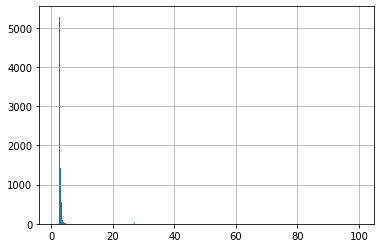

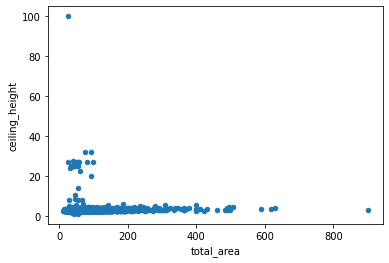

In [13]:
df['ceiling_height'].hist(bins = 500)
df.plot(x='total_area', y='ceiling_height', kind='scatter') 

Здесь видно, что есть несколько аномалий есть одно значение в 100м. Очевидно, что это выброс. Уберём его руками:

In [14]:
df.query('ceiling_height > 99')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,"15,000,000.00",25.00,2018-07-25T00:00:00,1,100.00,5.00,14.00,5,True,...,11.00,5.00,Санкт-Петербург,"34,963.00","8,283.00",1.00,223.00,3.00,30.00,19.00


Квартира площадью 25м2 и стоимостью 15 млн? Не верю! Заменим её медианой по СПб. Это не точно, но гораздо лучше, чем 100м. 

<AxesSubplot:xlabel='total_area', ylabel='ceiling_height'>

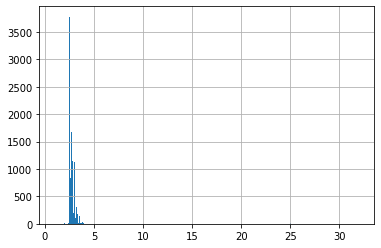

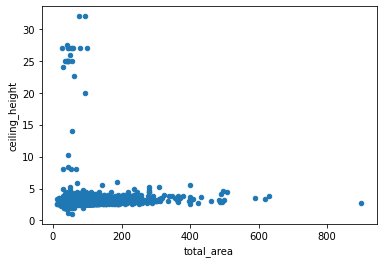

In [15]:
df.loc[22869, 'ceiling_height'] = 2.52
df['ceiling_height'].hist(bins = 500)
df.plot(x='total_area', y='ceiling_height', kind='scatter') 

Так стало лучше. Теперь избавимся от значений больше 20 - они, похоже, возникли из-за того, что перепутали запятую. Значит, нужно все эти значения поделить на 10.

Напишем функцию, которая будет высоту делить на 10. 

!! не помню, как применить функцию к датафрейму !! 
пока что перепишу проще, но на будущее нужно будет исправить.

In [16]:
def correct_high_ceiling_height(h):
  if h > 19:
    return h / 10
  else:
    return h

И применим её к столбцу *датафрейма*:

<AxesSubplot:xlabel='total_area', ylabel='ceiling_height'>

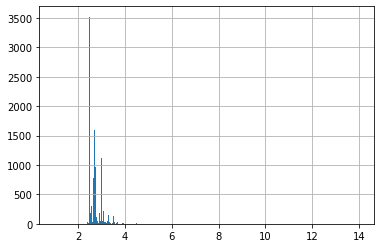

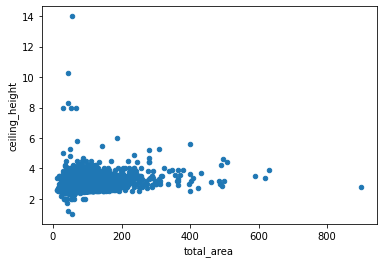

In [17]:
df['ceiling_height'] = df['ceiling_height'].apply(correct_high_ceiling_height)

df['ceiling_height'].hist(bins = 500)
df.plot(x='total_area', y='ceiling_height', kind='scatter') 

Ок, избавились от сверхбольших значений, посмотрим на ещё несколькко строк, где высота потолка больше 7м

In [18]:
df.query('ceiling_height > 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,"1,400,000.00",30.00,2018-03-16T00:00:00,1,8.00,5.00,15.30,2,False,...,7.30,0.00,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.00
5863,20,"5,650,000.00",45.00,2018-08-15T00:00:00,1,8.30,16.00,19.30,14,False,...,8.30,1.00,Санкт-Петербург,"13,069.00","10,763.00",0.00,NaN,1.00,613.00,14.00
15061,19,"5,600,000.00",56.40,2018-05-11T00:00:00,2,14.00,14.00,32.40,5,False,...,9.10,2.00,Санкт-Петербург,"14,814.00","13,610.00",0.00,NaN,0.00,NaN,315.00
15743,14,"5,600,000.00",67.00,2016-11-11T00:00:00,3,8.00,16.00,41.00,1,False,...,8.00,0.00,Санкт-Петербург,"32,691.00","11,035.00",1.00,723.00,0.00,NaN,474.00
17442,0,"5,350,000.00",54.00,2015-06-16T00:00:00,2,8.00,5.00,29.00,2,False,...,NaN,1.00,Красное Село,"24,638.00","28,062.00",0.00,NaN,0.00,NaN,469.00
22309,20,"5,300,000.00",45.00,2017-09-30T00:00:00,1,10.30,16.00,15.50,15,False,...,NaN,0.00,Санкт-Петербург,"36,353.00","11,936.00",2.00,440.00,2.00,450.00,136.00


Тут явно какая-то ошибка, поэтому значения в этих несколькх строчках можно заменить на медианные 2.52.

In [19]:
def correct_strange_ceiling_height(h):
    if h > 7:
        return 2.52
    else:
        return h

<AxesSubplot:xlabel='total_area', ylabel='ceiling_height'>

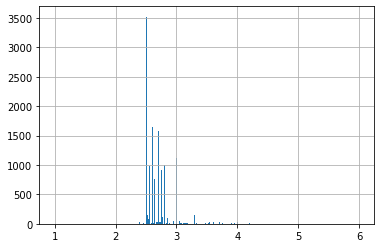

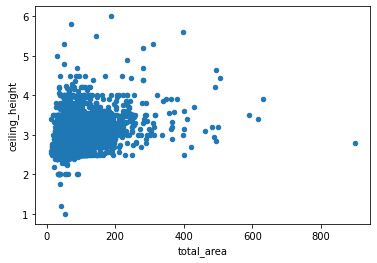

In [20]:
df['ceiling_height'] = df['ceiling_height'].apply(correct_strange_ceiling_height)

df['ceiling_height'].hist(bins = 500)
df.plot(x='total_area', y='ceiling_height', kind='scatter') 

Теперь стало видно ещё одну аномалию - слишком низкую высоту потолка. Применим сделаем этажи, где высота меньше 1.5м - медианной = 2.52м

In [21]:
def correct_low_ceiling_height(h):
  if h < 1.5:
    return 2.52
  else:
    return h

<AxesSubplot:xlabel='total_area', ylabel='ceiling_height'>

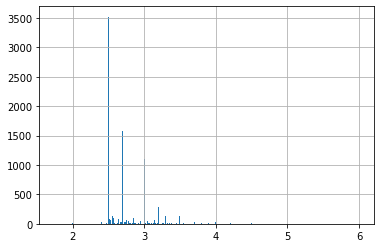

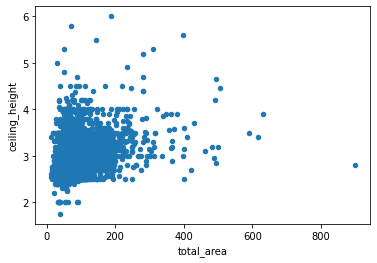

In [22]:
df['ceiling_height'] = df['ceiling_height'].apply(correct_low_ceiling_height)

df['ceiling_height'].hist(bins = 500)
df.plot(x='total_area', y='ceiling_height', kind='scatter') 

Выглядит всё равно кривовато (высота полков выше4м, площадь больше 200м2), но таких значений немного и по ним уже можно считать медиану и заполнять пропуски.

Построим сводную таблицу, где свяжем:
* название города, 
* количество объявлений в городе,
* среднюю высому полтолка.

In [23]:
df.pivot_table(index='locality_name', values='ceiling_height', aggfunc=['median', 'count'])

,median,count
,ceiling_height,ceiling_height
locality_name,,
Бокситогорск,3.90,2
Волосово,2.50,19
Волхов,2.58,58
Всеволожск,2.70,272
Выборг,2.55,98
...,...,...
село Никольское,NaN,0
село Паша,NaN,0


Отсюда можно сделать несколько ввыодов:
* в Бокситогорске скорее всего высброс, нужно его заменить,
* в остальном - нужно написать цикл, в котором можно было бы для каждого города забить NaN на медианное значение. 

Начнём с Бокситогорска.


In [24]:
df.loc[1053, 'ceiling_height'] = 2.52
df.query('locality_name == "Бокситогорск"')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
638,6,"980,000.00",47.10,2019-04-12T00:00:00,2,NaN,3.00,29.00,3,False,...,9.00,0.00,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,4,"950,000.00",44.00,2018-05-05T00:00:00,2,NaN,5.00,NaN,2,False,...,6.00,1.00,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,156.00
1053,13,"550,000.00",29.00,2018-02-01T00:00:00,1,2.52,3.00,NaN,1,False,...,NaN,0.00,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.00
1761,11,"999,000.00",62.00,2018-02-15T00:00:00,4,NaN,5.00,46.00,2,False,...,7.00,0.00,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,226.00
3010,6,"850,000.00",48.00,2016-03-11T00:00:00,2,NaN,5.00,NaN,5,False,...,NaN,0.00,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,174.00
3731,10,"1,310,000.00",65.60,2019-02-22T00:00:00,3,NaN,5.00,42.00,4,False,...,7.50,0.00,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5821,7,"820,000.00",51.00,2017-12-09T00:00:00,2,NaN,5.00,32.00,5,False,...,8.50,0.00,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,130.00
8630,3,"560,000.00",32.00,2018-06-16T00:00:00,1,NaN,3.00,17.00,1,False,...,6.00,0.00,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,45.00
8767,6,"650,000.00",45.00,2017-06-24T00:00:00,2,NaN,5.00,30.00,1,False,...,6.00,0.00,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,68.00
8779,9,"620,000.00",36.00,2018-01-15T00:00:00,1,NaN,5.00,19.00,5,False,...,8.00,0.00,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,45.00


Ещё раз считаем медиану для разных городов

In [25]:
median_ceiling_height_in_city = df.pivot_table(
    index='locality_name', 
    values='ceiling_height', 
    aggfunc=['median', 'count'])
median_ceiling_height_in_city

,median,count
,ceiling_height,ceiling_height
locality_name,,
Бокситогорск,2.66,2
Волосово,2.50,19
Волхов,2.58,58
Всеволожск,2.70,272
Выборг,2.55,98
...,...,...
село Никольское,NaN,0
село Паша,NaN,0


Переименуем столбцы

In [26]:
median_ceiling_height_in_city.columns = ['med_ceiling_height', 'count']
median_ceiling_height_in_city

,med_ceiling_height,count
locality_name,,
Бокситогорск,2.66,2
Волосово,2.50,19
Волхов,2.58,58
Всеволожск,2.70,272
Выборг,2.55,98
...,...,...
село Никольское,NaN,0
село Паша,NaN,0
село Рождествено,NaN,0


Заменим для строчек с NaN значениями из медианы по городу. 
Берём метод transform по рекомендации Ольги Макаревич.

!! нужно разобраться, как работает transform. Раньше не встречал такого обозначения. 

In [27]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('locality_name')['ceiling_height'].transform('median'))

In [28]:
df['ceiling_height'].isna().mean()

0.0051162790697674414

То есть строк, где есть NaN в поле `ceiling_height` осталось всего 0.5%.
Посмотрим, что это за строки и в каких городах.

In [29]:
df[df['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
110,6,"3,850,000.00",72.30,2017-09-29T00:00:00,2,NaN,3.00,27.40,2,False,...,23.60,0.00,деревня Пикколово,NaN,NaN,NaN,NaN,NaN,NaN,45.00
168,9,"2,250,000.00",73.00,2018-11-14T00:00:00,3,NaN,5.00,43.40,5,False,...,8.40,0.00,деревня Заклинье,NaN,NaN,NaN,NaN,NaN,NaN,46.00
986,10,"1,950,000.00",62.00,2015-02-19T00:00:00,3,NaN,5.00,NaN,5,False,...,NaN,0.00,поселок Севастьяново,NaN,NaN,NaN,NaN,NaN,NaN,"1,069.00"
1451,10,"1,150,000.00",33.00,2016-11-28T00:00:00,1,NaN,3.00,NaN,3,False,...,NaN,2.00,деревня Иссад,NaN,NaN,NaN,NaN,NaN,NaN,245.00
1625,7,"1,980,000.00",23.98,2018-02-01T00:00:00,0,NaN,4.00,10.50,3,False,...,NaN,1.00,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22918,14,"2,050,000.00",54.00,2019-04-17T00:00:00,2,NaN,5.00,32.00,4,False,...,9.00,2.00,посёлок Перово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22935,8,"799,000.00",47.20,2018-06-16T00:00:00,2,NaN,5.00,30.60,3,False,...,6.30,1.00,поселок Володарское,NaN,NaN,NaN,NaN,NaN,NaN,5.00
23048,7,"2,449,000.00",53.60,2018-07-10T00:00:00,2,NaN,5.00,28.40,2,False,...,8.80,0.00,коттеджный посёлок Лесное,NaN,NaN,NaN,NaN,NaN,NaN,161.00
23354,18,"900,000.00",42.60,2018-02-26T00:00:00,2,NaN,2.00,28.00,1,False,...,9.00,0.00,деревня Тихковицы,NaN,NaN,NaN,NaN,NaN,NaN,219.00


Похоже, что это сплошь деревни. 
Заполним их медианой по остальному датасету.

In [30]:
df['ceiling_height'].median()

2.7

In [31]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [32]:
df['ceiling_height'].isna().mean()

0.0

Пропусков не осталось, заполним пропуски для следующих столбцов.

На этот раз поработаем с площадью. 

#### Заполняем `living_area`, `kitchen_area`

`total_area` есть везде, поэтому можно попытаться восстановить значения других площадей. 


In [33]:
df[['kitchen_area', 'living_area', 'total_area']]

,kitchen_area,living_area,total_area
0,25.00,51.00,108.00
1,11.00,18.60,40.40
2,8.30,34.30,56.00
3,NaN,NaN,159.00
4,41.00,32.00,100.00
...,...,...,...
23694,13.83,73.30,133.81
23695,8.50,38.00,59.00
23696,NaN,29.70,56.70
23697,23.30,NaN,76.75


Восстанавливать постоянным значением было бы не правильно, т.к. оно сильно плавает и может даже оказаться больше общей площади.

Поэтому для пропусков будем рассчитывать замену как медианную долю от общей площади.

Создадим столбцы `living to total share` и `kitchen to total share`

In [34]:
df['living_to_total_share'] = df['living_area'] / df['total_area']
df['living_to_total_share'].describe()

count   21,752.00
mean         0.56
std          0.11
min          0.02
25%          0.50
50%          0.57
75%          0.64
max          1.00
Name: living_to_total_share, dtype: float64

In [35]:
df['kitchen_to_total_share']  = df['kitchen_area'] / df['total_area']
df['kitchen_to_total_share'].describe()

count   21,381.00
mean         0.19
std          0.07
min          0.03
25%          0.13
50%          0.17
75%          0.23
max          0.79
Name: kitchen_to_total_share, dtype: float64

Таким образом средние доли от общей площади получаются:
* жилая площадь = `0.567860`
* площадь кухни =`0.172414`

Заполним пропуски.

In [36]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * 0.172414)
df['kitchen_area'].isna().mean()

0.0

In [37]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * 0.567860)
df['living_area'].isna().mean()

0.0

Пропусков в этих столбцах не осталось. Переходим к следующим столбцам:

#### Заполняем `floors_total`
Тут пропущено меньше 1 процента, т.к. восстановить достоверно это значение не из чего, тогда посчитаем, что количество этажей совпадает с этажом рассматриваемой квартиры.

In [38]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])
df['floors_total'].isna().mean()

0.0

Пропусков в этих значениях не осталось.
Заполняем следующих столбцах.

#### Заполняем `parks_around3000` и `ponds_around3000`

Похоже, что если их не указали, то значит, их нет, то есть 0. Заменяем:

In [39]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'].isna().mean()

0.0

In [40]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'].isna().mean()

0.0

#### Заполняем `airports_nearest`, `parks_nearest` и `ponds_nearest`
Т.к. это расстояние, то не понятно, какие значения могут здесь быть. Очевидно, что если ближайший парк в соседнем городе, а город в 50 км, то значение в 50км  будет бесполезно. 

Поэтому оставим здесь пропущенные значения как NaN.

#### Заменяем `cityCenters_nearest`

Для больших городов разбег может быть очень большой. А большой город здесь один - это СПб. 

Будет неправильным брать медиану для всех, т.к. СПб значительно её сместит. Поэтому посмотрим на распределение значений для СПб и для всех остальных городов.

<AxesSubplot:>

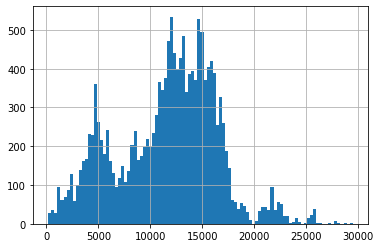

In [41]:
df.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].hist(bins = 100)

<AxesSubplot:>

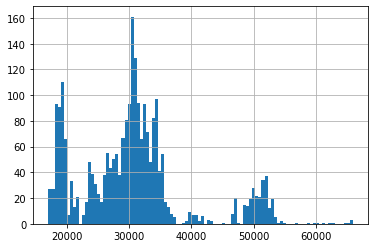

In [42]:
df.query('locality_name != "Санкт-Петербург"')['cityCenters_nearest'].hist(bins = 100)

На каждом графике есть как минимум несколько пиков. Похоже, что это какие-то районы. Если попасть в расстояние между ними - явно качество адатсета ухудшится. Поэтому оставляем в этих полях пропуски. 

#### Заменяем `days_exposition`

<AxesSubplot:>

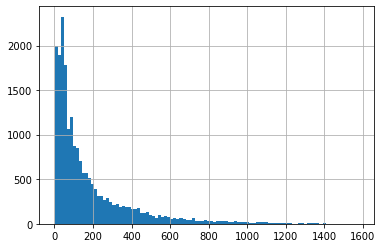

In [43]:
df['days_exposition'].hist(bins = 100)

In [44]:
df['days_exposition'].describe()

count   20,470.00
mean       180.75
std        219.78
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

Видно, что тут также есть закономерность - квартиры уходят быстро по экспоненте. 
Но если значение `days_exposition` не заполнено - это может быть свидетельством чего-то необычного, с чем можно было бы работать. Поэтому заполнять медианой - скорее вредно. Поэтому ставлю значения без изменений.

In [45]:
display(
  pd.DataFrame(
    round(
      (df.isna().mean()*100),2), 
      columns=['NaNs, %'])
      .style.format('{:.2f}')
      .background_gradient('coolwarm'))

,"NaNs, %"
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,0.00
floors_total,0.00
living_area,0.00
floor,0.00
is_apartment,0.00


Таким образом заполнлили все разумные пропуски, а там, где восстановить данные нельзя или вредно - оставили NaN.

<a id="step_2.2"></a>
### изменение типа данных
[к оглавлению](#back)

Напомним, какие данные какого типа в датасете встречаются:

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            23650 non-null  int64  
 1   last_price              23650 non-null  float64
 2   total_area              23650 non-null  float64
 3   first_day_exposition    23650 non-null  object 
 4   rooms                   23650 non-null  int64  
 5   ceiling_height          23650 non-null  float64
 6   floors_total            23650 non-null  float64
 7   living_area             23650 non-null  float64
 8   floor                   23650 non-null  int64  
 9   is_apartment            23650 non-null  bool   
 10  studio                  23650 non-null  bool   
 11  open_plan               23650 non-null  bool   
 12  kitchen_area            23650 non-null  float64
 13  balcony                 23650 non-null  float64
 14  locality_name           23650 non-null

**Итого меняем:**

* `floors_total` , `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` float64 - to int
* `first_day_exposition` float64 - to date

In [47]:
df.floors_total = df.floors_total.astype(int)
df.balcony = df.balcony.astype(int)
df.ponds_around3000 = df.ponds_around3000 .astype(int)
df.parks_around3000 = df.parks_around3000.astype(int)

Переменной `days_exposition` также нужно изменить тип. Но т.к. там есть пропущенные значения - возникает ошибка. Поэтому у этой переменной менять значене не буду

_df.days_exposition = df.days_exposition.astype(int)_

In [48]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].describe(datetime_is_numeric=True)

count                            23650
mean     2017-11-10 00:03:57.463002112
min                2014-11-27 00:00:00
25%                2017-05-15 00:00:00
50%                2017-12-12 00:00:00
75%                2018-08-27 00:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23650 non-null  int64         
 1   last_price              23650 non-null  float64       
 2   total_area              23650 non-null  float64       
 3   first_day_exposition    23650 non-null  datetime64[ns]
 4   rooms                   23650 non-null  int64         
 5   ceiling_height          23650 non-null  float64       
 6   floors_total            23650 non-null  int64         
 7   living_area             23650 non-null  float64       
 8   floor                   23650 non-null  int64         
 9   is_apartment            23650 non-null  bool          
 10  studio                  23650 non-null  bool          
 11  open_plan               23650 non-null  bool          
 12  kitchen_area            23650 non-null  float6

Итак, для обоих значений изменился тип данных. 

Можно идти дальше.

<a id="step_3"></a>
## Расчёты и добавление результатов в таблицу

[к оглавлению](#back)

Посчитаем и добавим в таблицу:
* цену квадратного метра;

In [50]:
df['m2_price'] = df['last_price'] / df['total_area']

* день недели, месяц и год публикации объявления;

!! удалось привести значения только к номерам дней в неделе, а хотелось бы найти, как это сделать в человеко-понятном виде.

In [51]:
df['publication_DOW'] = df['first_day_exposition'].dt.dayofweek
df['publication_month'] = df['first_day_exposition'].dt.month
df['publication_year'] = df['first_day_exposition'].dt.year

* этаж квартиры; варианты — первый, последний, другой;

In [52]:
def floor_type_change(row):
  if row['floor'] == 1:
    return 'первый'
  elif row['floor'] == row['floors_total']:
    return 'последний'
  elif 1 < row['floor'] < row['floors_total']:
    return 'другой'
  else:
    return 'глюк!'

In [53]:
df['floor_type'] = df.apply(floor_type_change, axis = 1)


соотношение жилой и общей площади, а также отношение площади кухни к общей.

Эти шаги сделал ещё раньше, переменные созданы, называются:
* `kitchen_to_total_share` - отношение площади кухни к общей
* `living_to_total_share` - соотношение жилой и общей площади

Проверм, есть ли у них пропущенные значения:

In [54]:
df['kitchen_to_total_share'].isna().mean()

0.09594080338266385

In [55]:
df['living_to_total_share'].isna().mean()

0.08025369978858352

Пропуски есть, причём их много. Заполним их медианными значениями

In [56]:
df['kitchen_to_total_share']  = df['kitchen_area'] / df['total_area']
df['living_to_total_share'] = df['living_area'] / df['total_area']
print(df['kitchen_to_total_share'].isna().mean())
print(df['living_to_total_share'].isna().mean())
df

0.0
0.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_to_total_share,kitchen_to_total_share,m2_price,publication_DOW,publication_month,publication_year,floor_type
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.00,NaN,0.47,0.23,"120,370.37",3,3,2019,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,2.63,11,18.60,1,False,...,0,NaN,81.00,0.46,0.27,"82,920.79",1,12,2018,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,2.70,5,34.30,4,False,...,2,574.00,558.00,0.61,0.15,"92,785.71",3,8,2015,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,2.70,14,90.29,9,False,...,3,234.00,424.00,0.57,0.17,"408,176.10",4,7,2015,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.00,121.00,0.32,0.41,"100,000.00",1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,"9,700,000.00",133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3,381.00,NaN,0.55,0.10,"72,490.85",1,3,2017,другой
23695,14,"3,100,000.00",59.00,2018-01-15,3,2.50,5,38.00,4,False,...,0,NaN,45.00,0.64,0.14,"52,542.37",0,1,2018,другой
23696,18,"2,500,000.00",56.70,2018-02-11,2,2.70,3,29.70,1,False,...,0,NaN,NaN,0.52,0.17,"44,091.71",6,2,2018,первый
23697,13,"11,475,000.00",76.75,2017-03-28,2,3.00,17,43.58,12,False,...,3,196.00,602.00,0.57,0.30,"149,511.40",1,3,2017,другой


Пропусков не осталось, можно переходить собственно к исследовательской части. 

<a id="step_4"></a>
## Исследовательский анализ данных
[к оглавлению](#back)

#### Изучим: площадь, цена, число комнат, высота потолков

**Изучим следующие параметры и пострим для каждого гистограмму:**
* площадь, 

<AxesSubplot:>

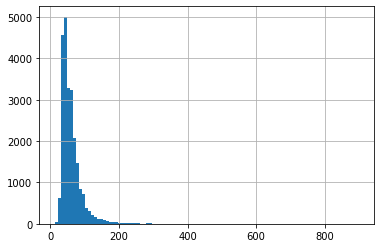

In [57]:
df['total_area'].hist(bins = 100)

<AxesSubplot:>

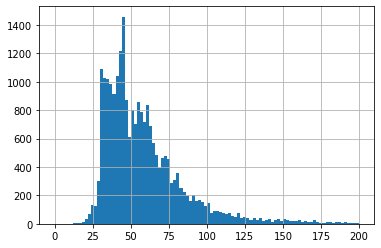

In [58]:
df['total_area'].hist(bins = 100, range = (0,200))

In [59]:
df['total_area'].describe()

count   23,650.00
mean        60.33
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

* цена, 

<AxesSubplot:>

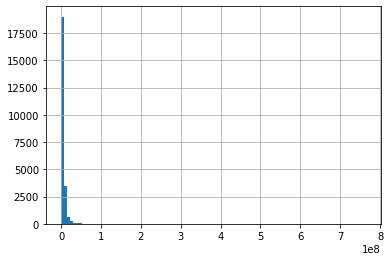

In [60]:
df['last_price'].hist(bins = 100)

<AxesSubplot:>

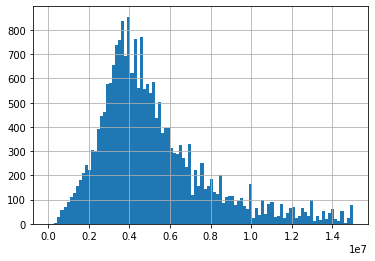

In [61]:
df['last_price'].hist(bins = 100, range = (0,15_000_000))

In [62]:
df['last_price'].describe()

count        23,650.00
mean      6,541,126.90
std      10,896,399.18
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,799,000.00
max     763,000,000.00
Name: last_price, dtype: float64

* число комнат, 

<AxesSubplot:>

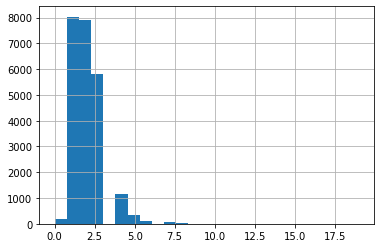

In [63]:
df['rooms'].hist(bins = 25)

<AxesSubplot:>

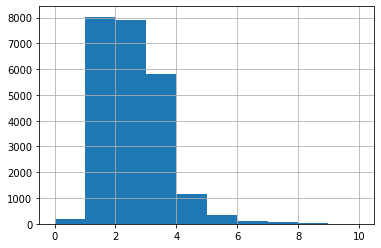

In [64]:
df['rooms'].hist(bins = 10, range = (0,10))

In [65]:
df['rooms'].describe()

count   23,650.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

Видно, что в некоторых значениях есть выбивающиеся значения, в частности, 0 комнат. Возможно, это связано с тем, что эти квартиры - студии. 


* высота потолков.

<AxesSubplot:>

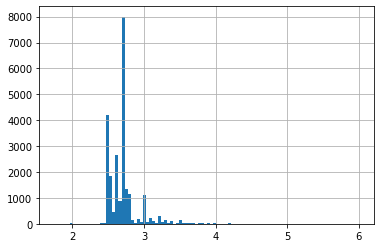

In [66]:
df['ceiling_height'].hist(bins = 100)

<AxesSubplot:>

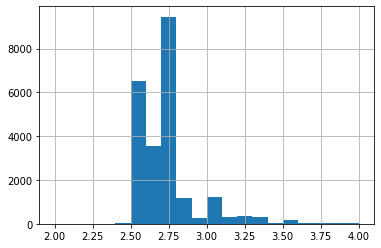

In [67]:
df['ceiling_height'].hist(bins = 20, range = (2, 4))

In [68]:
df['ceiling_height'].describe()

count   23,650.00
mean         2.70
std          0.22
min          1.75
25%          2.55
50%          2.70
75%          2.70
max          6.00
Name: ceiling_height, dtype: float64

#### Изучим: время продажи квартиры

Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

<AxesSubplot:>

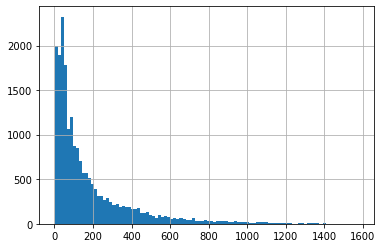

In [69]:
df['days_exposition'].hist(bins = 100)

<AxesSubplot:>

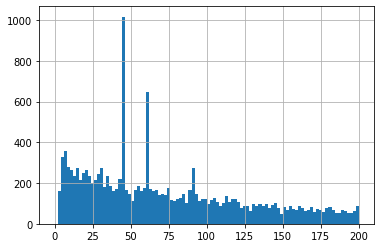

In [70]:
df['days_exposition'].hist(bins = 100, range = (0, 200))

Посчитаем среднюю и медиану:

In [71]:
df['days_exposition'].describe()

count   20,470.00
mean       180.75
std        219.78
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

Видно, что среднее значение  - 180 дней, а медиана - 45 дней.



Посчитаем медиану:

#### Уберём редкие и выбивающиеся значения. 


Опишем, какие особенности обнаружили: 

Из гистограм выше видно, что распределения имеют "жирный хвост". То есть много очень больших редких значений:
* 18 комнатные квартиры,
* квартиры за сотни миллионов рублей, 
* потолки высотой больше 4м,
* квартиры площадью 800м2.

Нужно проверить, насколько это частотные записи, а также насколько в них правдоподобная информация. 

Итак, смотрим:

##### **18 комнатные или очень дорогие квартиры:**


<AxesSubplot:>

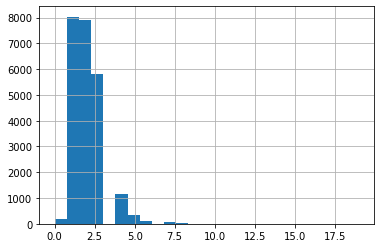

In [72]:
df['rooms'].hist(bins = 25)

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

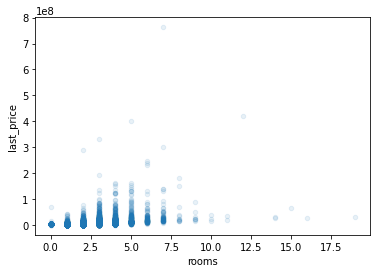

In [73]:
df.plot(
    x = 'rooms', 
    y = 'last_price', 
    kind = 'scatter',
    alpha = 0.1
)

Отсюда странно выглядят значения:
* больше 12 комнат, 
* дороже 200 млн.рублей.
Таких значений немного - несколько десятков. Если так и их доля и правда небольшая, то ими можно пренебречь. Проверим.

In [74]:
(
    df.query('rooms >= 12')['rooms'].count() / df['rooms'].count() +
    df.query('last_price > 200_000_000')['last_price'].count() / df['last_price'].count()
) * 100

0.06342494714587738

То есть таких значений не более 0,06%, значит, можно ими пренебречь и отбросить.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

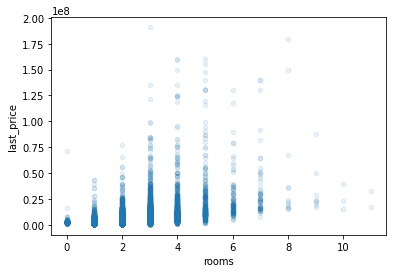

In [75]:
df.drop(df.query('rooms >= 12 or last_price > 200_000_000').index, inplace = True)
df.plot(
    x = 'rooms', 
    y = 'last_price', 
    kind = 'scatter', 
    alpha = 0.1
)

##### **квартиры площадью 800м2**

<AxesSubplot:>

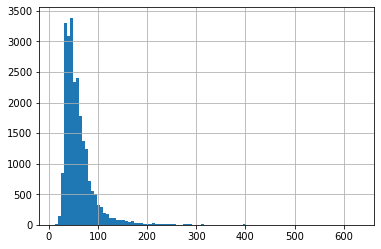

In [76]:
df['total_area'].hist(bins = 100)

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

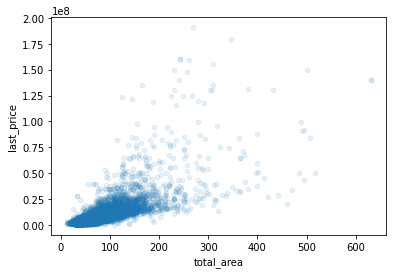

In [77]:
df.plot(x = 'total_area', y = 'last_price', kind = 'scatter', alpha = 0.1)

Здесь есть редкие, но не выбивающиеся значения. 
Удалять их не будем.

##### **Квартиры с нереально большой высотой потолков:**


<AxesSubplot:>

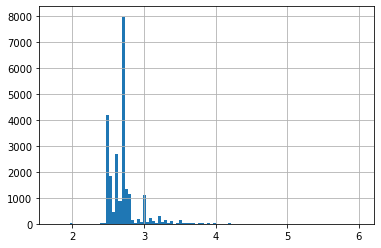

In [78]:
df['ceiling_height'].hist(bins = 100)

<AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>

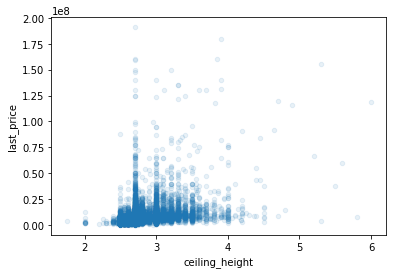

In [79]:
df.plot(x = 'ceiling_height', y = 'last_price', kind = 'scatter', alpha = 0.1)

<AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>

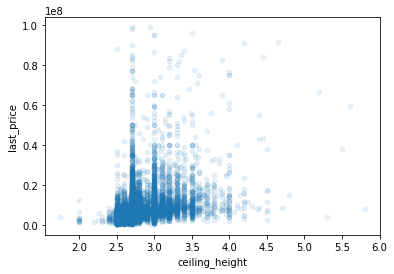

In [80]:
df.query('last_price < 100_000_000').plot(x = 'ceiling_height', y = 'last_price', kind = 'scatter', alpha = 0.1)

Итого, здесь есть редкие и выбивающиеся значения, но они кажутся правдоподобными, поэтому не будем их удалять. 

#### Изучим, какие факторы больше всего влияют на стоимость квартиры? 


##### зависимость цены от площади, числа комнат, удалённости от центра. 


In [81]:
df_tmp = df.loc[:, ['last_price', 'rooms', 'total_area', 'cityCenters_nearest']]
df_tmp.corr()

,last_price,rooms,total_area,cityCenters_nearest
last_price,1.00,0.43,0.74,-0.27
rooms,0.43,1.00,0.76,-0.18
total_area,0.74,0.76,1.00,-0.23
cityCenters_nearest,-0.27,-0.18,-0.23,1.00


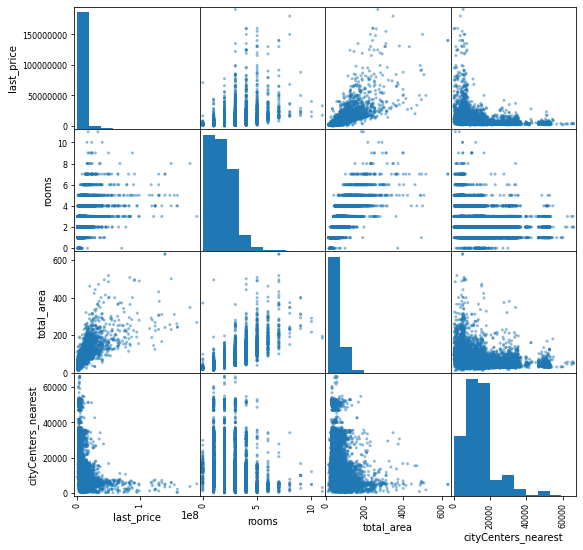

In [82]:
pd.plotting.scatter_matrix(df_tmp, figsize = (9,9))
None

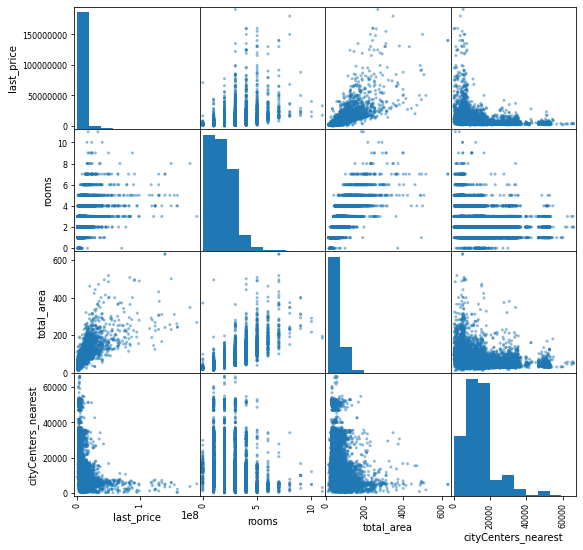

In [83]:
# Код ревьюера

pd.plotting.scatter_matrix(df_tmp, figsize = (9,9))
None

**Итого:**

цена квартиры:
* слабо коррелирует (k = 0.43) с количеством комнат, 
* сильно корреклирует (k = 0.74) с общей площадью,
* имеет очень слабую корреляцию (k = -0.27) с удалённостью от центра. Это странно - нужно проверить, как это будет играть в СПб, и в остальных городах. 

Сначала проверим для СПб:

In [84]:
df_tmp['locality_name'] = df['locality_name']

In [85]:
df_tmp.query('locality_name == "Санкт-Петербург"').corr()

,last_price,rooms,total_area,cityCenters_nearest
last_price,1.00,0.45,0.75,-0.33
rooms,0.45,1.00,0.76,-0.29
total_area,0.75,0.76,1.00,-0.34
cityCenters_nearest,-0.33,-0.29,-0.34,1.00


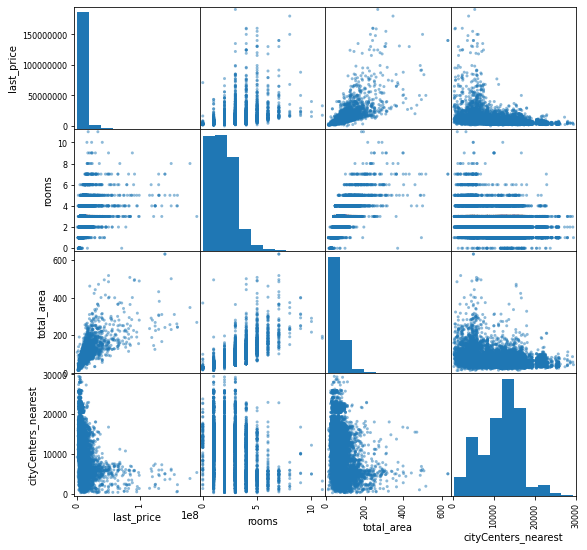

In [86]:
pd.plotting.scatter_matrix(df_tmp.query('locality_name == "Санкт-Петербург"'), figsize = (9,9))
None

Построим аналогичную картинку для НЕ СПб.

In [87]:
df_tmp.query('locality_name != "Санкт-Петербург"').corr()

,last_price,rooms,total_area,cityCenters_nearest
last_price,1.00,0.41,0.72,-0.01
rooms,0.41,1.00,0.78,0.13
total_area,0.72,0.78,1.00,0.03
cityCenters_nearest,-0.01,0.13,0.03,1.00


Как видим, зависимость цены от количества комнат и общей площади - примерно одинаковая для СПб и других городов, а вот аналогичный показатель для зависимости цены от расстояния от цента города - сильно отличается. В маленьких городах цена от этого расстояния почти не зависит, но в СПБ - чем дальше, тем дешевле.

##### **Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.**

Для Санкт-Петербурга:

In [88]:
print('Медианное значение цены за 1м2 на этажах разных типов:')
print('Первый', df.query('locality_name == "Санкт-Петербург" and floor_type == "первый"')['m2_price'].median())
print('Последний', df.query('locality_name == "Санкт-Петербург" and floor_type == "последний"')['m2_price'].median())
print('Другой', df.query('locality_name == "Санкт-Петербург" and floor_type == "другой"')['m2_price'].median())

Медианное значение цены за 1м2 на этажах разных типов:
Первый 93308.45771144278
Последний 101915.27143581938
Другой 106714.28571428571


**Для НЕ Санкт-Петербурга:**

In [89]:
print('Медианное значение цены за 1м2 на этажах разных типов:')
print('Первый', df.query('locality_name != "Санкт-Петербург" and floor_type == "первый"')['m2_price'].median())
print('Последний', df.query('locality_name != "Санкт-Петербург" and floor_type == "последний"')['m2_price'].median())
print('Другой', df.query('locality_name != "Санкт-Петербург" and floor_type == "другой"')['m2_price'].median())

Медианное значение цены за 1м2 на этажах разных типов:
Первый 59059.343434343435
Последний 60439.56043956044
Другой 73083.3120368004


Создадим таблицу, для которой было бы удобно построить график.

In [90]:
td = pd.DataFrame({
    'Этаж': ['Первый', 'Последний','Другой'],
    'СПб' : [
        df.query('locality_name == "Санкт-Петербург" and floor_type == "первый"')['m2_price'].median(), 
        df.query('locality_name == "Санкт-Петербург" and floor_type == "другой"')['m2_price'].median(),
        df.query('locality_name == "Санкт-Петербург" and floor_type == "последний"')['m2_price'].median()
    ],
    'Не СПб' : [
        df.query('locality_name != "Санкт-Петербург" and floor_type == "первый"')['m2_price'].median(),
        df.query('locality_name != "Санкт-Петербург" and floor_type == "другой"')['m2_price'].median(),
        df.query('locality_name != "Санкт-Петербург" and floor_type == "последний"')['m2_price'].median()
    ]
})

td

,Этаж,СПб,Не СПб
0,Первый,"93,308.46","59,059.34"
1,Последний,"106,714.29","73,083.31"
2,Другой,"101,915.27","60,439.56"


<AxesSubplot:xlabel='Этаж'>

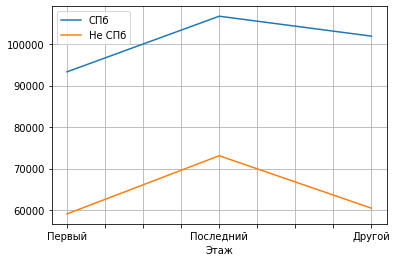

In [91]:
td.plot(x = 'Этаж', grid = True)

Таким образом видно, что наиболее ценными являются квартиры, которые располагаются не на крайних этажах.

Медианная цена за 1м2 на первом этаже -самая низкая.

На последнем - чуть выше, но всё равно ниже, чем на других этажах.

В других городах зависимость проявляется аналогично СПб, но более выражена. 

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23636 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23636 non-null  int64         
 1   last_price              23636 non-null  float64       
 2   total_area              23636 non-null  float64       
 3   first_day_exposition    23636 non-null  datetime64[ns]
 4   rooms                   23636 non-null  int64         
 5   ceiling_height          23636 non-null  float64       
 6   floors_total            23636 non-null  int64         
 7   living_area             23636 non-null  float64       
 8   floor                   23636 non-null  int64         
 9   is_apartment            23636 non-null  bool          
 10  studio                  23636 non-null  bool          
 11  open_plan               23636 non-null  bool          
 12  kitchen_area            23636 non-null  float6

##### **Зависимость цены от даты размещения: дня недели, месяца и года.**

Посмотрим на зависимость от года / месяца и дня недели в Санкт-Петербурге.

Построим графики, как меняется медиана цены в разные годы, месяцы и дни недели.

!! как можно отслеживать корреляции с категорийным изначениями?

**Зависимость медианы цены от года в СПб:**

In [93]:
df.query('locality_name == "Санкт-Петербург" and floor_type == "первый"')['m2_price'].median(), 


ty = df.query('locality_name == "Санкт-Петербург"').pivot_table(
    index = 'publication_year',
    values = 'm2_price',
    aggfunc = 'median'
)

ty

,m2_price
publication_year,
2014,"132,500.00"
2015,"102,012.47"
2016,"100,731.71"
2017,"101,601.83"
2018,"106,423.86"
2019,"113,541.67"


<AxesSubplot:xlabel='publication_year'>

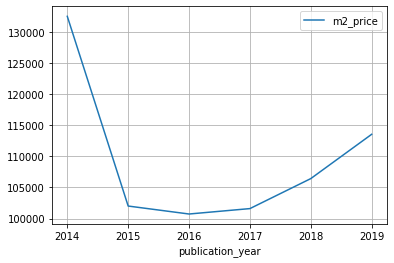

In [94]:
ty.plot(grid = True)

In [95]:
tm = df.query('locality_name == "Санкт-Петербург"').pivot_table(
    index = 'publication_month',
    values = 'm2_price',
    aggfunc = 'median'
)

tm

,m2_price
publication_month,
1,"106,009.12"
2,"104,166.67"
3,"106,557.38"
4,"106,382.98"
5,"101,451.61"
6,"103,278.69"
7,"103,474.58"
8,"105,555.56"
9,"105,920.14"


<AxesSubplot:xlabel='publication_month'>

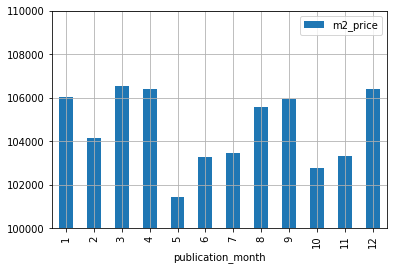

In [96]:
tm.plot(
    grid = True,
    ylim = (100000, 110000),
    kind = 'bar'
)

In [97]:
t_d = df.query('locality_name == "Санкт-Петербург"').pivot_table(
    index = 'publication_DOW',
    values = 'm2_price',
    aggfunc = 'median'
)

t_d

,m2_price
publication_DOW,
0,"104,916.69"
1,"104,638.62"
2,"104,650.00"
3,"105,869.75"
4,"104,242.42"
5,"104,141.31"
6,"104,472.22"


<AxesSubplot:xlabel='publication_DOW'>

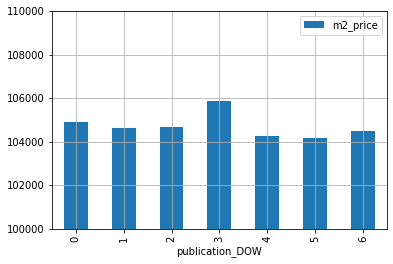

In [98]:
t_d.plot(
    grid = True,
    ylim = (100000, 110000),
    kind = 'bar'
)

**Зависимость цены м2 от года / месяца и дня недели публикации в других городах:**

In [99]:
t_y_ = df.query('locality_name != "Санкт-Петербург"').pivot_table(
    index = 'publication_year',
    values = 'm2_price',
    aggfunc = 'median'
)

t_y_

,m2_price
publication_year,
2014,"66,366.24"
2015,"69,548.73"
2016,"67,505.27"
2017,"67,857.14"
2018,"70,000.00"
2019,"70,000.00"


<AxesSubplot:xlabel='publication_year'>

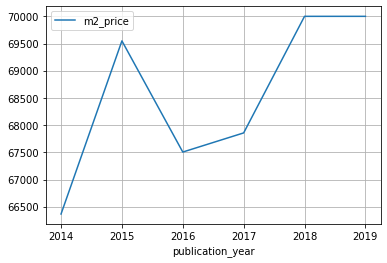

In [100]:
t_y_.plot(
    grid = True,
)

In [101]:
t_m_ = df.query('locality_name != "Санкт-Петербург"').pivot_table(
    index = 'publication_month',
    values = 'm2_price',
    aggfunc = 'median'
)

t_m_

,m2_price
publication_month,
1,"70,689.66"
2,"68,160.89"
3,"67,663.77"
4,"67,465.32"
5,"70,000.00"
6,"67,226.89"
7,"69,491.02"
8,"69,090.91"
9,"69,089.73"


<AxesSubplot:xlabel='publication_month'>

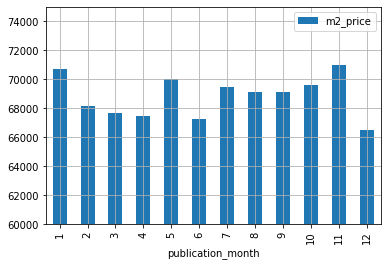

In [102]:
t_m_.plot(
    grid = True,
    ylim = (60_000, 75_000),
    kind = 'bar'
)

In [103]:
t_d_ = df.query('locality_name != "Санкт-Петербург"').pivot_table(
    index = 'publication_DOW',
    values = 'm2_price',
    aggfunc = 'median'
)

t_d_

,m2_price
publication_DOW,
0,"69,190.60"
1,"68,965.52"
2,"68,465.00"
3,"68,280.96"
4,"69,811.32"
5,"67,892.16"
6,"67,815.83"


<AxesSubplot:xlabel='publication_DOW'>

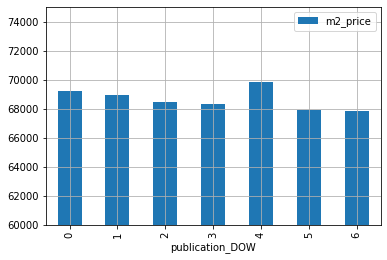

In [104]:
t_d_.plot(
    grid = True,
    ylim = (60_000, 75_000),
    kind = 'bar'
)

###### Выводы 
получаются неожиданные - цена продажи зависит не только от года, но и от месяца и дня размещения объявления. 

**В Санкт-Петербурге:**
* _В зависимости от года_
В 2015 году цена 1м2 упала с 130 до 100 тыс руб, и в течении следующих лет немного отрастала до 115 тыс в 2019 году.

* _В зависимости от месяца_
Месяц - влияет! Разброс получается весьма существенный - порядка 4-5%. Самый "дешёвый" месяц - май (цена за 1м2 - порядка 100 тыс руб), средние значения (ок 101-102 тыс рублей) - в феврале, июне, июле, октябре и ноябре. В остальные месяцы  средняя стоимость продажи высокая - порядка 103..104 тыс руб.

* _В зависимости от дня недели_
День имеет значение!
На дне недели также можно выиграть порядка 1.5% - дороже всего продают квартиры, размещённые в четверг по отношению к тем, которые размещаются в пчтницу и субботу. Остальные дни - где-то между ними.

**В других городах:**
* _В зависимости от года_
Здесь ситуация иная, нежели в СПб. Здесь в 2015 года наоборот был рост по сравнению с 2014 около 4.5%. Вероятно, в этом году те, кто хотел взять квартиры в СПБ, таки взяли их в области. в 20-16 и 2017 году был спад, а в 2018 и 2019 цена за 1м2 выросла на 1% больше, чем в 2015. 

* _В зависимости от месяца_
В области также есть свои "дешёвые" и "дорогие" месяцы, причём разница достигает 5%, что много!
Дешевле всего покупают квартиры в декабре и июле, дороже всего - в январе, мае и ноябре. 

* _В зависимости от дня недели_
Размах между дешёвыми и дорогими достигает 3%. Самый дешёвый 1м2 - в выходные, самый дорогой- в пятницу. Остальные дни - между ними. 

?? Как можно учитывать корреляции в категорийных переменных.

#### Посчитаем среднюю цену квадратного метра в населённых пунктах, где больше всего объявлений.

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

!! Как сортировать данные в датафрейме? - с помощью sort_values()

Выделим крупнейшие по количеству объявлений локации, а также посчитаем среднюю и медианную стоимость жилья (за 1 м2).

In [105]:
df_top = df.pivot_table(
    index = 'locality_name', 
    values = 'm2_price',
    aggfunc = ['count', 'mean', 'median']
)

df_top.columns = ['count', 'mean_m2_price', 'median_m2_price']
df_top10 = df_top.sort_values('count', ascending = False).head(10)
df_top10

,count,mean_m2_price,median_m2_price
locality_name,,,
Санкт-Петербург,15707,"114,344.63","104,761.90"
посёлок Мурино,522,"85,752.19","85,878.46"
посёлок Шушары,440,"78,677.36","76,876.17"
Всеволожск,398,"68,654.47","65,789.47"
Пушкин,369,"103,125.82","100,000.00"
Колпино,338,"75,424.58","74,723.75"
посёлок Парголово,327,"90,175.91","91,642.86"
Гатчина,307,"68,746.15","67,796.61"
деревня Кудрово,299,"92,473.55","91,860.47"


И посмотрим, где наибольшая и наименьшая стоимость жилья:

In [106]:
df_top10.sort_values('median_m2_price', ascending = False)

,count,mean_m2_price,median_m2_price
locality_name,,,
Санкт-Петербург,15707,"114,344.63","104,761.90"
Пушкин,369,"103,125.82","100,000.00"
деревня Кудрово,299,"92,473.55","91,860.47"
посёлок Парголово,327,"90,175.91","91,642.86"
посёлок Мурино,522,"85,752.19","85,878.46"
посёлок Шушары,440,"78,677.36","76,876.17"
Колпино,338,"75,424.58","74,723.75"
Гатчина,307,"68,746.15","67,796.61"
Всеволожск,398,"68,654.47","65,789.47"


Построим "ящик с усами" для топ-10 городов:

Сначала найдём список городов с наибольшим количеством объявлений:

In [107]:
top10_cities_lst = df.groupby('locality_name')['last_price'].count().sort_values(ascending = False).head(10)
top10_cities_lst

locality_name
Санкт-Петербург      15707
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: last_price, dtype: int64

Создадим переменную, куда выведем датафрейм, в котором есть только те объявления, которые относятся к городам из ТОП-10:

In [108]:
df_top10_for_boxplot = df.query('locality_name in @top10_cities_lst.index')
df_top10_for_boxplot = df_top10_for_boxplot.loc[:, ['locality_name', 'last_price']]
df_top10_for_boxplot.head(10)

,locality_name,last_price
0,Санкт-Петербург,"13,000,000.00"
1,посёлок Шушары,"3,350,000.00"
2,Санкт-Петербург,"5,196,000.00"
3,Санкт-Петербург,"64,900,000.00"
4,Санкт-Петербург,"10,000,000.00"
6,посёлок Парголово,"3,700,000.00"
7,Санкт-Петербург,"7,915,000.00"
8,посёлок Мурино,"2,900,000.00"
9,Санкт-Петербург,"5,400,000.00"
10,Санкт-Петербург,"5,050,000.00"


Подготовим датафрейм, из которого будем делать boxplot-ы:

In [109]:
grouped = df_top10_for_boxplot.groupby('locality_name')
grouped

df2 = pd.DataFrame({col:vals['last_price'] for col,vals in grouped})
df2.head(10)

,Всеволожск,Выборг,Гатчина,Колпино,Пушкин,Санкт-Петербург,деревня Кудрово,посёлок Мурино,посёлок Парголово,посёлок Шушары
0,NaN,NaN,NaN,NaN,NaN,"13,000,000.00",NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,350,000.00"
2,NaN,NaN,NaN,NaN,NaN,"5,196,000.00",NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,"64,900,000.00",NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,"10,000,000.00",NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,700,000.00",NaN
7,NaN,NaN,NaN,NaN,NaN,"7,915,000.00",NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,900,000.00",NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,"5,400,000.00",NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,"5,050,000.00",NaN,NaN,NaN,NaN


Создадим переменную с медианами, по которым будем сортировать:

In [110]:
meds = df2.median().sort_values(ascending=False)
meds

Санкт-Петербург     5,500,000.00
Пушкин              5,180,000.00
посёлок Парголово   4,100,000.00
посёлок Шушары      3,950,000.00
деревня Кудрово     3,790,000.00
Колпино             3,600,000.00
Всеволожск          3,450,000.00
посёлок Мурино      3,400,000.00
Гатчина             3,100,000.00
Выборг              2,897,000.00
dtype: float64

In [111]:
meds.index

Index(['Санкт-Петербург', 'Пушкин', 'посёлок Парголово', 'посёлок Шушары',
       'деревня Кудрово', 'Колпино', 'Всеволожск', 'посёлок Мурино', 'Гатчина',
       'Выборг'],
      dtype='object')

... и датафрейм, по которому у нас будет проходить сортировка (изменяется порядок столбцов):

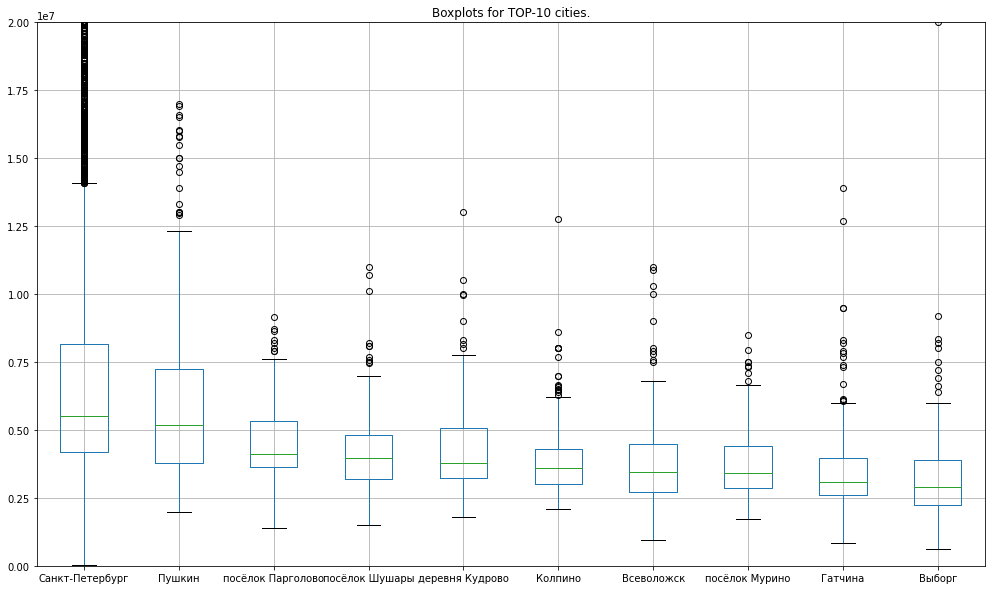

In [112]:
df2 = df2[meds.index]
ax = df2.boxplot(figsize = (17,10))
ax.set_title("Boxplots for TOP-10 cities.")
ax.set_ylim([0,20_000_000])
plt.show()

Получилось наглядно. 

Для перепроверки построим стобчатый график:

<AxesSubplot:xlabel='locality_name'>

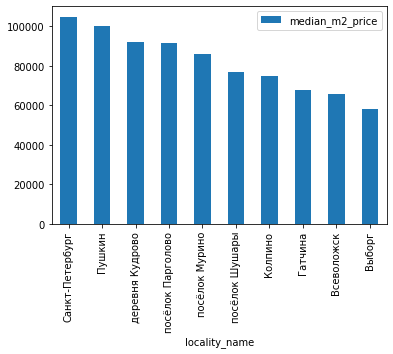

In [113]:
df_top10.sort_values('median_m2_price', ascending = False)[['median_m2_price']].plot(
    kind = 'bar'
)

Понятно - самая высокая цена за 1м2 - в СПб, самая низкая - в Выборге.

?? как можно форматировать цифры, чтобы читать было бы проще.

#### Изучим предложения квартир: 
для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге, чтобы выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах и округлим до целых значений. 

In [114]:
df['distance_to_center_km'] = df['cityCenters_nearest'] // 1000

После этого посчитайте среднюю цену для каждого километра в Санкт-Петербурге.

In [115]:
df_d = df.query('locality_name == "Санкт-Петербург"').pivot_table(
    index = 'distance_to_center_km',
    values = 'm2_price',
    aggfunc = 'median'
)

df_d

,m2_price
distance_to_center_km,
0.00,"138,536.99"
1.00,"123,847.88"
2.00,"116,197.18"
3.00,"110,080.01"
4.00,"126,112.76"
5.00,"125,797.88"
6.00,"134,042.55"
7.00,"125,000.00"
8.00,"114,137.69"


Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.


<AxesSubplot:xlabel='distance_to_center_km'>

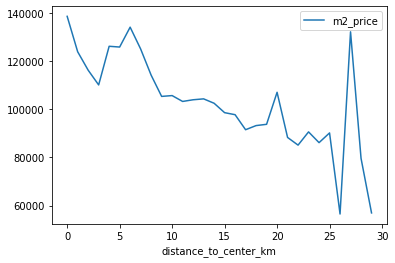

In [116]:
df_d.plot()

Судя по графику сложно понять, где здесь резкий скачок. Примем, что эта цифра = 10 км.

Но можно посмотреть абсолютные цифры - на медианную стоимость жилья в зависимости от удалённости от центра.

In [117]:
df_lp = df.query('locality_name == "Санкт-Петербург"').pivot_table(
    index = 'distance_to_center_km',
    values = 'last_price',
    aggfunc = 'median'
)

df_lp.head(10)

,last_price
distance_to_center_km,
0.00,"11,750,000.00"
1.00,"10,735,000.00"
2.00,"9,500,000.00"
3.00,"8,500,000.00"
4.00,"9,900,000.00"
5.00,"8,900,000.00"
6.00,"8,000,000.00"
7.00,"7,500,000.00"
8.00,"6,500,000.00"


<AxesSubplot:xlabel='distance_to_center_km'>

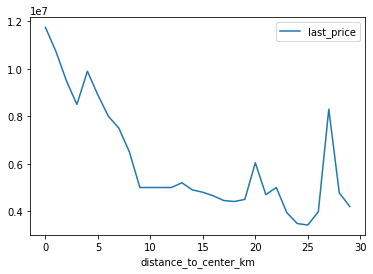

In [118]:
df_lp.plot()

Здесь также это значение находится где-то в районе 9 км.

#### Изучим квартиры в центре СПб и по всей базе

Выделим сегмент квартир в центре и построим графики по всем параметрам.

 Рассмотрим следующие параметры:


##### площадь x цена:

**Центр СПб / вся база:**

Создадим переменную, в которую запишем все строчки, которые относятся к центру СПб:

In [119]:
df_spb_center = df.query('locality_name == "Санкт-Петербург" and distance_to_center_km <= 9')
df_spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,living_to_total_share,kitchen_to_total_share,m2_price,publication_DOW,publication_month,publication_year,distance_to_center_km
count,"5,058.00","5,058.00","5,058.00","5,058.00","5,058.00","5,058.00","5,058.00","5,058.00","5,058.00","5,058.00",...,"5,058.00","3,301.00","4,274.00","5,058.00","5,058.00","5,058.00","5,058.00","5,058.00","5,058.00","5,058.00"
mean,10.00,"12,133,393.23",83.47,2.61,2.89,8.23,48.99,4.73,13.48,0.38,...,1.16,473.62,227.57,0.58,0.18,"135,072.93",2.52,6.35,"2,017.23",5.36
std,5.95,"14,453,734.39",52.45,1.31,0.34,5.07,33.69,3.66,8.79,0.82,...,1.09,264.72,262.42,0.11,0.08,"69,121.00",1.75,3.45,1.11,2.44
min,0.00,"12,190.00",12.00,0.00,2.00,2.00,2.00,1.00,2.00,0.00,...,0.00,22.00,2.00,0.02,0.03,111.83,0.00,1.00,"2,014.00",0.00
25%,5.00,"5,700,000.00",49.00,2.00,2.70,5.00,28.00,2.00,8.10,0.00,...,0.00,250.00,54.00,0.52,0.12,"98,076.92",1.00,3.00,"2,017.00",4.00
50%,10.00,"8,200,000.00",70.90,2.00,2.70,6.00,41.00,4.00,11.00,0.00,...,1.00,454.00,120.50,0.58,0.16,"118,634.53",3.00,6.00,"2,017.00",5.00
75%,14.00,"12,700,000.00",99.40,3.00,3.00,10.00,59.60,6.00,15.50,0.00,...,2.00,670.00,310.00,0.65,0.20,"146,978.40",4.00,9.00,"2,018.00",8.00
max,50.00,"190,870,000.00",631.20,11.00,6.00,28.00,358.32,26.00,107.00,5.00,...,3.00,"1,313.00","1,572.00",0.98,0.64,"995,983.94",6.00,12.00,"2,019.00",9.00


In [120]:
df_spb_center['last_price'].corr(df_spb_center['total_area'])

0.7253480551301236

In [121]:
df['last_price'].corr(df['total_area'])

0.7401424102686722

<AxesSubplot:>

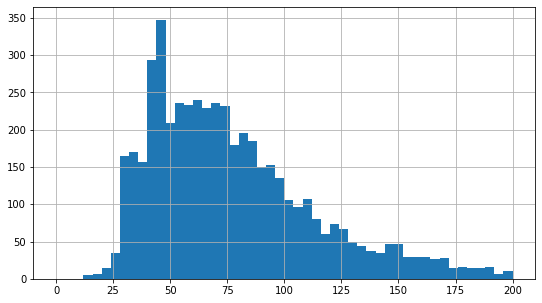

In [122]:
df_spb_center['total_area'].hist(bins = 50, figsize = (9,5), range = (0, 200))

<AxesSubplot:>

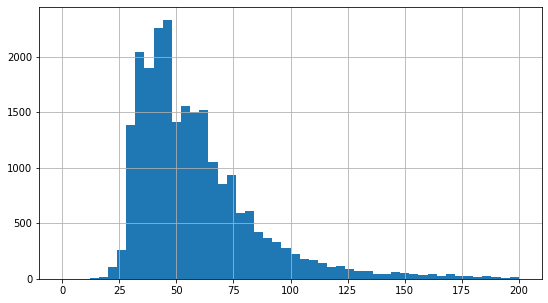

In [123]:
(
    df['total_area'].hist(bins = 50, figsize = (9,5), range = (0, 200))
)

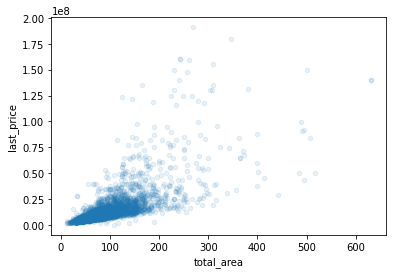

In [124]:
df_spb_center.plot(
    x = 'total_area', 
    y = 'last_price', 
    kind = 'scatter',
    alpha = 0.1
)
None


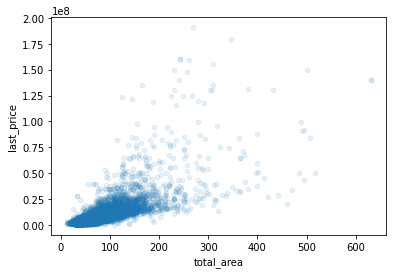

In [125]:
df.plot(x = 'total_area', y = 'last_price', kind = 'scatter', alpha = 0.1)
None

Выводы (точнее, наблюдения) по этому графику:
* квартиры в центре СПб очень сильно различаются по площади. Есть большой пик в районе 35-45м2, который похож на однушки, есть  пик в районе 50-75 (двушк-трёшки), а дальше есть достаточно много квартир вплоть до 200м2. Гипотеза, что это коммуналки. Её можно будет проверить, когда будем смотреть колчество комнат и площади кухонь. 

* в других городах большие квартиры (> 75м2) также встречаются, но их доля меньше.

* Есть очень сильная корреляция (0.72...0.75) между площадью квартры и ценой как в других городах, так и в центре СПб. 


##### число комнат x цена:


**В центре СПб / в целом по базе:**

In [126]:
 df_spb_center['last_price'].corr(df_spb_center['rooms'])

0.42412588327552

In [127]:
(
  df['last_price'].corr(df['rooms'])
)

0.4343715718321848

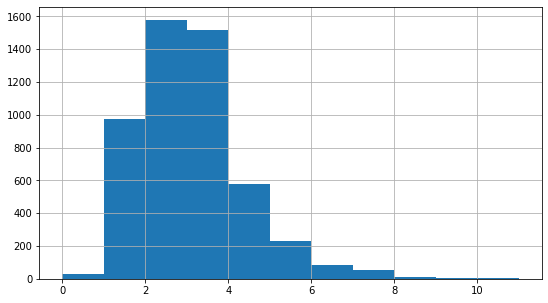

In [128]:
df_spb_center['rooms'].hist(bins = 11, figsize = (9,5))
None

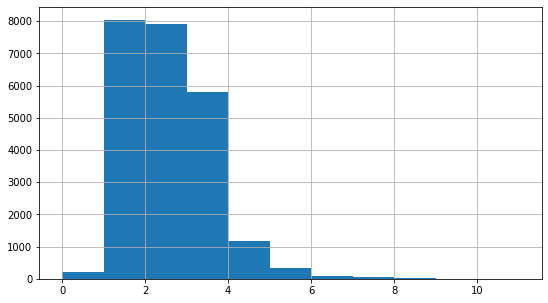

In [129]:
df['rooms'].hist(bins = 11, figsize = (9,5))
None

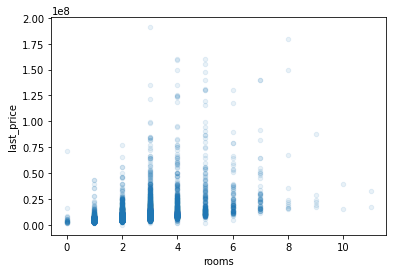

In [130]:
 df_spb_center.plot(x = 'rooms', y = 'last_price', kind = 'scatter', alpha = 0.1)
None

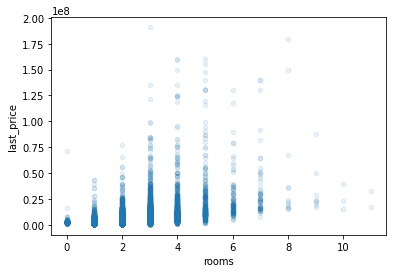

In [131]:
df.plot(x = 'rooms', y = 'last_price', kind = 'scatter', alpha = 0.1)
None

Судя по этому графику, гипотеза подтверждается:
* есть незначительное количество студий, 
* есть около 1000 объявлений о продаже однушек в СПб, и больше 8000 - в целом по базе.
* доля 2-3 комнатных квартир в центре СПб и всей базе примерно оданковая, 
* но вот доля многокомнатных квартир (больше 4х комнат) в центре СПб гораздо больше - похоже, что это и есть коммуналки.
* корреляция между количеством комнат и ценой есть (0.42..0.43), но она меньше, чем между площадью и ценой (0.72..0.75)

##### высота потолков x цена: 

**В центре СПб**

In [132]:
df_spb_center['last_price'].corr(df_spb_center['ceiling_height'])

0.2670779559958558

In [133]:
df['ceiling_height'].corr(df['last_price'])

0.3977767722980996

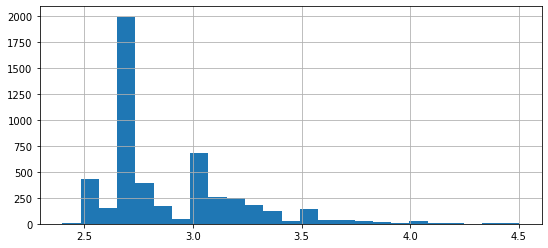

In [134]:
df_spb_center['ceiling_height'].hist(bins = 25, figsize = (9,4), range = (2.4, 4.5))
None

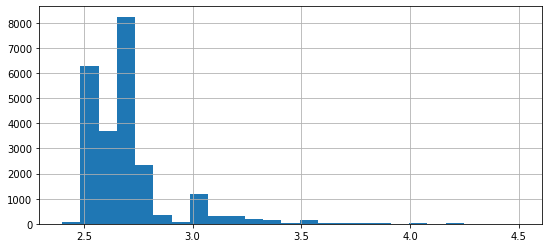

In [135]:
df['ceiling_height'].hist(bins = 25, figsize = (9,4), range = (2.4, 4.5))
None

* В квартирах есть некоторые стандарты по высоте потолков - 2.5, 2.75, 3.0, 3.5 и 4м
* В центре СПб доля квартир с высокими потолками гораздо выше, чем в целом по базе, но корреляция с ценой небольшая (0.26)
* при этом в целом по базе доля квартир с высокими потолками существенно ниже, а корреляция с ценой - выше (0.40).


##### этаж x цена:

Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Медианные значения цены за 1м2 в центре СПб:

In [136]:
print('Медианное значение цены за 1м2 на этажах разных типов:')
print('Первый', df_spb_center['m2_price'].median())
print('Последний', df_spb_center['m2_price'].median())
print('Другой', df_spb_center['m2_price'].median())

Медианное значение цены за 1м2 на этажах разных типов:
Первый 118634.53389830509
Последний 118634.53389830509
Другой 118634.53389830509


In [137]:
df_spb = df.query('locality_name == "Санкт-Петербург"')

In [138]:
tf_spb = pd.DataFrame({
    'Этаж': ['Первый', 'Другой','Последний'],
    'СПб' : [
        df_spb.query('floor_type == "первый"')['m2_price'].median(), 
        df_spb.query('floor_type == "другой"')['m2_price'].median(),
        df_spb.query('floor_type == "последний"')['m2_price'].median()
    ]
})

tf_all = pd.DataFrame({
    'Этаж': ['Первый', 'Другой','Последний'],
    'вся база' : [
        df.query('floor_type == "первый"')['m2_price'].median(), 
        df.query('floor_type == "другой"')['m2_price'].median(),
        df.query('floor_type == "последний"')['m2_price'].median()
    ]
})

display(tf_spb)
display(tf_all)

tf_floor_compare_all_vs_spbc = tf_all.merge(tf_spb, on = 'Этаж', how = 'outer')

tf_floor_compare_all_vs_spbc['diff'] = tf_floor_compare_all_vs_spbc['СПб'] / tf_floor_compare_all_vs_spbc['вся база'] - 1

tf_floor_compare_all_vs_spbc

,Этаж,СПб
0,Первый,"93,308.46"
1,Другой,"106,714.29"
2,Последний,"101,915.27"


,Этаж,вся база
0,Первый,"81,236.81"
1,Другой,"98,283.26"
2,Последний,"88,028.17"


,Этаж,вся база,СПб,diff
0,Первый,"81,236.81","93,308.46",0.15
1,Другой,"98,283.26","106,714.29",0.09
2,Последний,"88,028.17","101,915.27",0.16


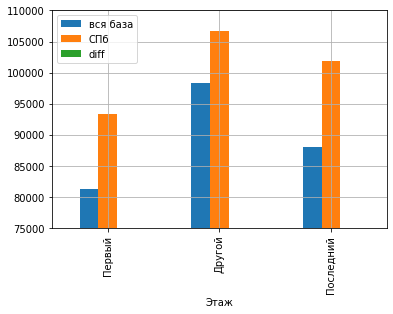

In [139]:
tf_floor_compare_all_vs_spbc.plot(x = 'Этаж', grid = True, kind = 'bar', ylim = (75_000,110_000))
None

Медианные значения цены за 1м2 по всей базе:

?? как можно инвертировать фильтр?? Например, сделать фильтр по центру СПб и по всему остальному?

In [140]:
print('Медианное значение цены за 1м2 на этажах разных типов:')
print('Первый', df.query('floor_type == "первый"')['m2_price'].median())
print('Последний', df.query('floor_type == "последний"')['m2_price'].median())
print('Другой', df.query('floor_type == "другой"')['m2_price'].median())

Медианное значение цены за 1м2 на этажах разных типов:
Первый 81236.81434599156
Последний 88028.16901408452
Другой 98283.2618025751


* вне зависимости от локации этаж сильно влияет на цену 1 м2. Самые привлекательные и дорогие квартиры - не на крайних этажах. Квартиры на последних этажах в среднем на ~10% дешевле них, а квартиры на первом - на ~20%.

##### удалённость от центра и цена

В центре СПб:


In [141]:
df_spb_center['m2_price'].corr(df_spb_center['cityCenters_nearest'])

-0.14993825926605067

 По всей базе:

In [142]:
df['m2_price'].corr(df['cityCenters_nearest'])

-0.3468230059133447

А также в виде диаграммы рассеяния (в абсолютных цифрах)

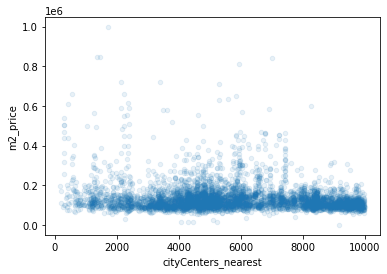

In [143]:
df_spb_center.plot(
    x = 'cityCenters_nearest', 
    y = 'm2_price', 
    kind = 'scatter', 
    alpha = 0.1)
None

А также в виде диаграммы рассеяния (в ценах за 1 м2)

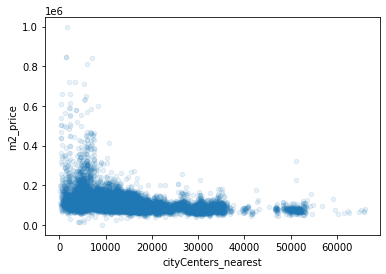

In [144]:
df.plot(x = 'cityCenters_nearest', y = 'm2_price', kind = 'scatter', alpha = 0.1)
None

Ситуация с удалённостью от центра для центра СПб и всей базы существенно отличается:
1) для центра СПб - есть слабая отрцательная корреляция (-0.19) между стоимостю недвижимости и удалённостью от центра. Если живёшь в центре - цена будет падать незначительно при удалении.
2) а для всей базы - такая коррелция сильно выше (-0.35) - чем дальше от центра - тем дешевле.

**Проверим дату размещения объявления и цены**

в числовом значении выдаёт ошибку, похоже, что  не возможно сделать корреляцию с датой. Поэтому будем строть сразу диаграмму рассеяния:

**Для абсолютных цен на квартиру:**

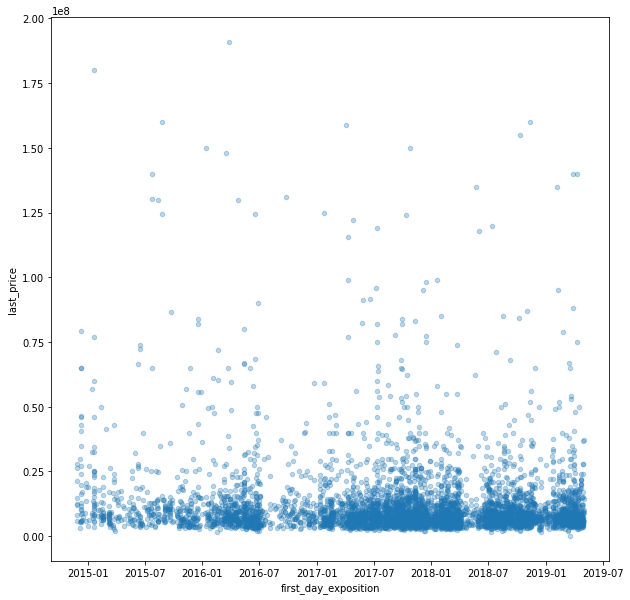

In [145]:
df_spb_center.plot(
    x = 'first_day_exposition', 
    y = 'last_price', 
    kind = 'scatter',
    figsize = (10,10),
    alpha = 0.3)
None

**Для цен за 1м2:**

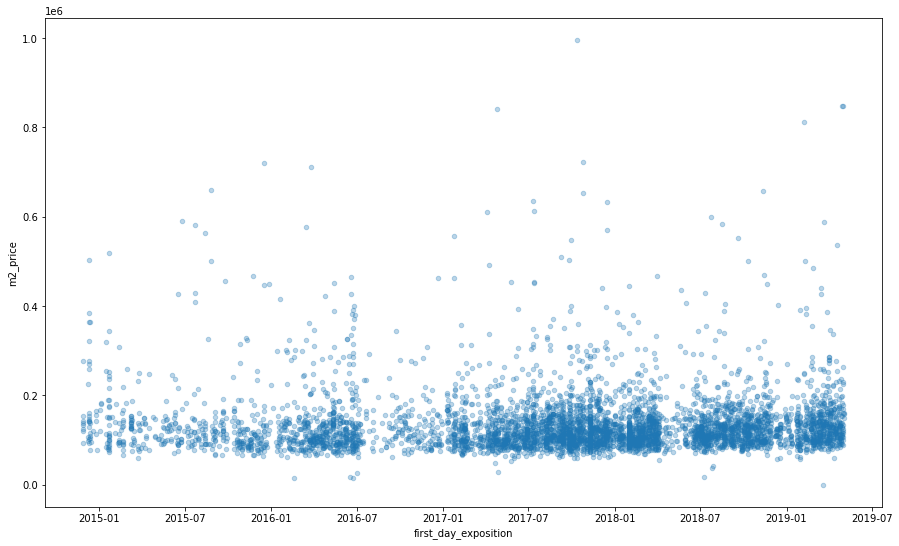

In [146]:
df_spb_center.plot(
    x = 'first_day_exposition', 
    y = 'm2_price', 
    kind = 'scatter',
    figsize = (15,9),
    alpha = 0.3)
None

На графике видно, что:
* объявлений о продаже от года к году становтся больше. Вероятно, это связано с тем, что сам сервис Яндекс.Недвижимости становится более популярным. 
* есть сезонные просадки по продажам - в районе лета и нового года. 

?? интересно, как ещё можно связать параметр "цена" и "время размещения объявления"? ИЛИ, когда размещать объявление, чтобы недвижимость можно было продать дороже. 

##### Публикация в разные годы, месяцы и дни И цена.

###### Годы.
Сравним медианные цены в центре СПб и всей базе в разнце годы.

In [147]:
df_full_y = df.pivot_table(
    index = 'publication_year',
    values = 'm2_price',
    aggfunc = 'median'  
)

df_full_y

,m2_price
publication_year,
2014,"106,901.90"
2015,"93,364.78"
2016,"91,666.67"
2017,"92,560.36"
2018,"95,704.32"
2019,"103,270.22"


In [148]:
ty_spbc = df_spb_center.pivot_table(
    index = 'publication_year',
    values = 'm2_price',
    aggfunc = 'median'
)

ty_spbc

,m2_price
publication_year,
2014,"140,780.11"
2015,"117,316.34"
2016,"114,545.45"
2017,"116,054.16"
2018,"119,276.82"
2019,"128,579.72"


Объединим обе таблицы, чтобы можно было строить сопоставимые графики.

In [149]:
spbc_all_year_comparsion = df_full_y.merge(
    ty_spbc, 
    on = 'publication_year', 
    how = 'outer'
)

spbc_all_year_comparsion.columns = ['all locations', 'SPb center']

spbc_all_year_comparsion

,all locations,SPb center
publication_year,,
2014,"106,901.90","140,780.11"
2015,"93,364.78","117,316.34"
2016,"91,666.67","114,545.45"
2017,"92,560.36","116,054.16"
2018,"95,704.32","119,276.82"
2019,"103,270.22","128,579.72"


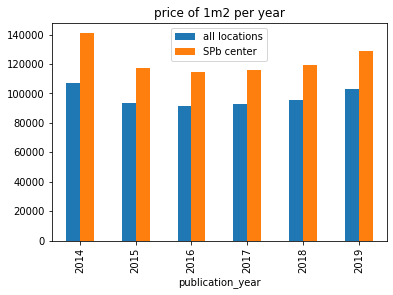

In [150]:
spbc_all_year_comparsion.plot(
    kind = 'bar',
    title = 'price of 1m2 per year'
)
None

**Выводы.**

на графке можно отследить только изменение цены квадратного метра в от года к году. И во всей базе, и в центре СПб был спад в 15-18 годах, который почти восстановился к 2019.

Для целей исследования можно заметить, что при отсутствии резких изменений  не может сильно отличаться от медианной. Если отличается сильно - это должно насторожить.

###### Месяцы.
Сравним медианные цены в центре СПб и всей базе в разнце месяцы.

In [151]:
df_full_m = df.pivot_table(
    index = 'publication_month',
    values = 'm2_price',
    aggfunc = 'median'  
)

df_full_m

,m2_price
publication_month,
1,"95,209.58"
2,"95,000.00"
3,"95,233.27"
4,"96,423.65"
5,"92,857.14"
6,"92,876.66"
7,"95,023.94"
8,"96,103.24"
9,"95,608.01"


In [152]:
df_spbc_m = df_spb_center.pivot_table(
    index = 'publication_month',
    values = 'm2_price',
    aggfunc = 'median'  
)

df_spbc_m

,m2_price
publication_month,
1,"120,030.58"
2,"115,151.52"
3,"123,458.80"
4,"117,204.84"
5,"115,767.31"
6,"114,919.44"
7,"116,654.77"
8,"123,958.33"
9,"120,262.98"


Объединим обе таблицы, чтобы можно было строить сопоставимые графики.

In [153]:
spbc_all_month_comparsion = df_full_m.merge(
    df_spbc_m, 
    on = 'publication_month', 
    how = 'outer'
)

spbc_all_month_comparsion.columns = ['all locations', 'SPb center']

spbc_all_month_comparsion

,all locations,SPb center
publication_month,,
1,"95,209.58","120,030.58"
2,"95,000.00","115,151.52"
3,"95,233.27","123,458.80"
4,"96,423.65","117,204.84"
5,"92,857.14","115,767.31"
6,"92,876.66","114,919.44"
7,"95,023.94","116,654.77"
8,"96,103.24","123,958.33"
9,"95,608.01","120,262.98"


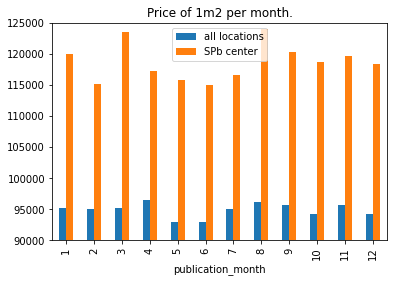

In [154]:
spbc_all_month_comparsion.plot(
    kind = 'bar',
    ylim = (90_000, 125_000),
    title = 'Price of 1m2 per month.'

)
None

**Выводы**

Видно, что цена за 1 м2, по которой продавали недвижимость, сильно отличается в центре СПб и по всей базе. Разница достигает **3.8%**.

"дорогие" и "дешёвые" месяцы здесь разные. Например, дороже всего продать в центре СПб можно, если разместить объявление в марте, а в других местах - в апреле. 

При этом провальные месяцы  и там, и там в мае  в июле.

###### Дни недели.
Сравним медианные цены в центре СПб и всей базе в разнце дни недели.

In [155]:
df_full_d = df.pivot_table(
    index = 'publication_DOW',
    values = 'm2_price',
    aggfunc = 'median'  
)

df_full_d

,m2_price
publication_DOW,
0,"94,680.85"
1,"95,613.12"
2,"95,454.55"
3,"95,132.92"
4,"94,608.15"
5,"93,548.39"
6,"94,594.59"


In [156]:
df_spbc_d = df_spb_center.pivot_table(
    index = 'publication_DOW',
    values = 'm2_price',
    aggfunc = 'median'  
)

df_spbc_d

,m2_price
publication_DOW,
0,"119,357.87"
1,"116,766.25"
2,"118,348.88"
3,"117,795.45"
4,"117,984.38"
5,"121,153.85"
6,"123,376.62"


Объединим обе таблицы, чтобы можно было строить сопоставимые графики.

In [157]:
spbc_all_day_comparsion = df_full_d.merge(
    df_spbc_d, 
    on = 'publication_DOW', 
    how = 'outer'
)

spbc_all_day_comparsion.columns = ['all locations', 'SPb center']

spbc_all_day_comparsion

,all locations,SPb center
publication_DOW,,
0,"94,680.85","119,357.87"
1,"95,613.12","116,766.25"
2,"95,454.55","118,348.88"
3,"95,132.92","117,795.45"
4,"94,608.15","117,984.38"
5,"93,548.39","121,153.85"
6,"94,594.59","123,376.62"


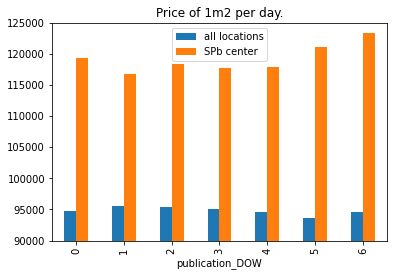

In [158]:
spbc_all_day_comparsion.plot(
    kind = 'bar',
    ylim = (90_000, 125_000),
    title = 'Price of 1m2 per day.'

)
None

**Выводы**

Видно, что цена за 1 м2, по которой продавали недвижимость, отличается в центре СПб и по всей базе. Разница достигает для всей базы **2%**, и **5.6%** для центра СПб.

"дорогие" и "дешёвые" дни недели здесь разные. Размещать объявление не в центре СПб лучше в вторник-четверг.
А в центре СПБ - лучше на выходных.

##### **Выводы. Отличаются ли они от общих выводов по всей базе?**

Ключевые отличия по всей базе и по центру СПб проявляются по следующим параметрам:
* `расстояние до центра` - для центра СПб цена меняется слабо (-0.19), а в целом по базе - гораздо  существеннее (-0.34).
* `высота пололков` - слабо влияет на цену в центре СПб, и ощутимо - в целом по базе.
* медианная `цена за 1м2` ощутимо зависит от `года публикации`. Тенденции в целом по базе и в центре СПб одинаковые - когда растёт одно - растёт и другое. НО. В центре СПб колебания за цену 1м2 сильнее. В центре СПБ цена упала на **22.9%**, в то вермя, как в целом по базе - только на **12,9%**. Аналогично, восстановление цены также было более значительным.
* медианная `цена за 1м2` ощутимо зависит от `месяца публикации`. Размах в цене может составлять **3.8%** Причём в целом по базе и в центре СПб есть свои "дорогие" и "дешёвые" месяцы.
* медианная `цена за 1м2` ощутимо зависит от `дня недели публикации`. Разница достигает для всей базы **2%**, и **5.6%** для центра СПб. "дорогие" и "дешёвые" дни недели здесь разные. Размещать объявление не в центре СПб лучше в вторник-четверг. А в центре СПБ - лучше на выходных.
* `этаж` и `площадь` одинаково важны  в центре СПб и в целом по базе.
* квартиры в центре СПб сильно различаются по площади. Есть большой пик в районе 35-45м2, который похож на однушки, есть пик в районе 50-75 (двушк-трёшки), а дальше есть достаточно много квартир вплоть до 200м2. Вероятно, это коммуналки. Других городах большие квартиры (> 75м2) также встречаются, но их доля меньше. Есть очень сильная корреляция (0.72...0.75) между площадью квартры и ценой как в других городах, так и в центре СПб. 
* в целом по базе доля однушек в 2 раза больше, чем в центре СПб.
* Потолки в целом по базе ниже, чем в СПб. Но цена за 1м2 там в 1.6 раза сильнее влияет на цену, чем в центре СПб.
* Этаж  влияет на цену - квартиры на НЕкрайних этажах стоят на 10..15 дороже, чем на крайних. При этом цена за 1м2 на некрайние этажи отличается на 10%, в то время как на крайне - на 15-16% в целом по базе от тех, что в центре СПб.

<a id="step_5"></a>
## Общий вывод
[к оглавлению](#back)

**Репрезентативность выборки:**
* база после очистки содержит более 23 тыс записей, около 15 тыс из них относится к СПб, и более конкретно около 5000 - к цетру СПб. Этого достаточно для исследования. 

**Пропуски и как они были заполнены?**
* В исходных данных было достаточно много пропусков. Некоторые из них понятно, почему не были заполнены. Например, `количество балконов`, `является ли недвижимость аппартаментами`, `количество прудов` и `парков вокруг` - если они не заполнены, то это значит, что балконов нет, и это не аппартаменты, и парков и прудов здесь нет. 
* Пропуски в `имени города` заполнить нечем, т.к. нет признаков, по которыми можно их восстановить. 
* `Высота потолков` - также не везде заполнена, или была явно большая. Нереальные значения я привёл к медианным, либо разделил на 10, если это имело смысл.
* `Площадь кухни и жилую` я восстанавливал, исходя из того, какая медианная доля жилой и кухонной площади есть по базе. А общая площадь была известа везде. 
* `Общее количество этажей` - если оно не было известно, то я присваивал это значение этажу текущей квартиры.
* Если были не известны `расстояние до центра` или `до аэропорта`, то ничем не заполнял их, т.к. восстановить эти данные не из чего. 
* Если было не заполнено `колчество дней до снятия с продажи`, то я считал, что объявление ещё висит, и заполнять это поле не нужно. 

Основной интерес при работе был в том, чтобы определить:
* какие факторы и как влияют на цену, а также
* какие есть рамки нормы при размещении объявлений и "тенденции", по которым можно было бы судить о нормальности / НЕнормальности.

**Факторы, влияющие на цену / признаки нормы.**
* Есть разные правила для центра СПб и для остальной базы. О них будем говорить дальше. 

**Вне зависимости от того, это центр СПб, или где-то ещё.**
* сильнее всего влияет на цену `площадь недвижимости` (коэффициент корреляции ~0.74). 
* `этаж` - самые привлекательные и дорогие квартиры - не на крайних этажах. Последний этаж снижает стоимость на 10%, первый - на 20%.
* `число комнат` влияет на цену - чем больше комнат, тем больше цена, но существенно слабее, чем площадь (коэффциент корреляции = 0.42..0.43). 

**Различается для центра СПб и для всей базы:**
* высота потолков. В центра СПб длоя квартир с высокими потолками гораздо выше, но высота потолков на цену влияет слабо. Больше влияет площадь и количество комнат. В целом по базе - корреляция цены с высотой потоклв выше. 
* `расстояние до центра` - для центра СПб цена меняется слабо (-0.19), а в целом по базе - гораздо  существеннее (-0.34).
* `высота пололков` - слабо влияет на цену в центре СПб, и ощутимо - в целом по базе.
* медианная `цена за 1м2` ощутимо зависит от `года публикации`. Тенденции в целом по базе и в центре СПб одинаковые - когда растёт одно - растёт и другое. НО. В центре СПб колебания за цену 1м2 сильнее. В центре СПБ цена упала на **22.9%**, в то вермя, как в целом по базе - только на **12,9%**. Аналогично, восстановление цены также было более значительным.
* медианная `цена за 1м2` ощутимо зависит от `месяца публикации`. Размах в цене может составлять **3.8%** Причём в целом по базе и в центре СПб есть свои "дорогие" и "дешёвые" месяцы.
* медианная `цена за 1м2` ощутимо зависит от `дня недели публикации`. Разница достигает для всей базы **2%**, и **5.6%** для центра СПб. "дорогие" и "дешёвые" дни недели здесь разные. Размещать объявление не в центре СПб лучше в вторник-четверг. А в центре СПБ - лучше на выходных.
* `этаж` и `площадь` одинаково важны  в центре СПб и в целом по базе.
* квартиры в центре СПб сильно различаются по `площади`. Есть большой пик в районе 35-45м2, который похож на однушки, есть пик в районе 50-75м2 (двушк-трёшки), а дальше есть достаточно много квартир вплоть до 200м2. Вероятно, это коммуналки. Других городах большие квартиры (> 75м2) также встречаются, но их доля меньше. Есть очень сильная корреляция (0.72...0.75) между площадью квартры и ценой как в других городах, так и в центре СПб. 
* в целом по базе доля однушек в 2 раза больше, чем в центре СПб.
* `Высота потолков` в целом по базе ниже, чем в СПб. Но цена за 1м2 там в 1.6 раза сильнее зависит от высоты потолков, чем в центре СПб.
* `Этаж`  влияет на цену - квартиры на НЕкрайних этажах стоят на 10..15 дороже, чем на крайних. При этом цена за 1м2 на некрайние этажи отличается на 10%, в то время как на крайне - на 15-16% в целом по базе от тех, что в центре СПб.

?? в целом что осталось неясным:
по идее эта работа нужна для того, чтобы автоматизировать проверку. Но даже после всех рекомендованных действий не понятно, как эти данные смогут позволить построить подобную автоматизированную систему?